In [1]:
import matplotlib.pyplot as plt
import numpy as np

import skimage as ski

from skimage import data
from skimage.morphology import disk, binary_dilation
from skimage.restoration import inpaint

d:\Program Files D\ANACONDA\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


- *disk*: This function creates a structure in the shape of a disk with a specified radius. It sets the value of pixels at a certain distance from the center of the disk to 1 and the value of other pixels to 0. This structure is commonly used in various image processing applications such as filtering, morphological operations, and analysis of structural features.

- *binary_dilation*: This function performs a dilation operation on a binary image. Dilation expands the locations of white pixels (1) by changing their positions to include the positions of surrounding black pixels (0). This operation is widely used in applications such as object filling, edge detection, and object enlargement.

In [2]:
original_image = data.astronaut()

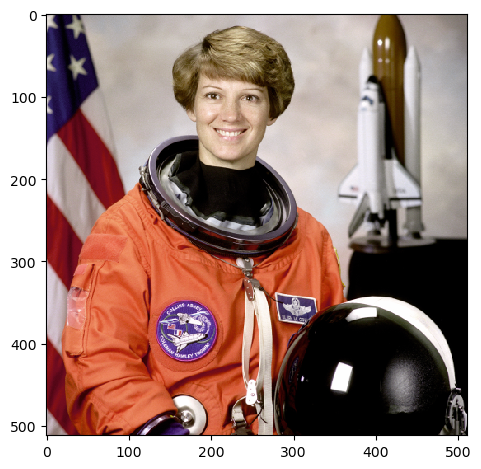

In [3]:
ski.io.imshow(original_image)

#### Create mask with six block defect regions

In [4]:

mask = np.zeros(original_image.shape[:-1], dtype=bool)
mask[20:60, 0:20] = 1
mask[160:180, 70:155] = 1
mask[30:60, 170:195] = 1
mask[-60:-30, 170:195] = 1
mask[-180:-160, 70:155] = 1
mask[-60:-20, 0:20] = 1

#### Add a few long, narrow defects

In [6]:
mask[200:205, -200:] = 1
mask[150:255, 20:23] = 1
mask[365:368, 60:130] = 1

#### Add randomly positioned small point-like defects

In [8]:
rstate = np.random.default_rng(0)
for radius in [0, 2, 4]:
    # larger defects are less common
    thresh = 3 + 0.25 * radius  # make larger defects less common
    tmp_mask = rstate.standard_normal(original_image.shape[:-1]) > thresh
    if radius > 0:
        tmp_mask = binary_dilation(tmp_mask, disk(radius, dtype=bool))
    mask[tmp_mask] = 1

- Random Number Generator Initialization:
rstate = np.random.default_rng(0): This initializes a random number generator (rstate) with a specific seed value (0). Using a seed ensures that the random numbers generated are reproducible.

- Defect Generation Loop:
for radius in [0, 2, 4]:: This loop iterates over three different defect radii: 0, 2, and 4.

- Defect Probability Threshold Calculation:
thresh = 3 + 0.25 * radius: It calculates a threshold value for defect probability based on the radius of the defect. Larger defects have a lower probability of occurrence.

- Defect Mask Generation:
tmp_mask = rstate.standard_normal(image_orig.shape[:-1]) > thresh: This line generates a random mask (tmp_mask) with the same shape as the original image, where the probability of each pixel being marked as defective depends on the threshold calculated earlier.

- Dilation of Defects:
if radius > 0: tmp_mask = binary_dilation(tmp_mask, disk(radius, dtype=bool)): For defects with a non-zero radius, the defect mask is dilated using a disk-shaped structuring element with the specified radius. This step expands the size of the defects.

- Mask Update:
mask[tmp_mask] = 1: The defective regions identified by the tmp_mask are marked as 1 in the mask array. This mask will be used to selectively apply the defects to the original image.

 ##

#### Apply defect mask to the image over the same region in each color channel

In [10]:
image_defect = original_image * ~mask[..., np.newaxis]

**~mask**: The ~ operator is used to invert the mask, so that defective regions become False (0) and 
non-defective regions become True (1).

**[..., np.newaxis]**: This part adds a new axis to the mask array to make it compatible with the original image dimensions. 
This ensures that the mask can be applied to each color channel of the image.

**image_orig * ~mask[..., np.newaxis]**: Finally, the defect mask is applied to the original image 
using element-wise multiplication. This operation effectively sets the pixels in the defective regions of the image to zero, 
while leaving the non-defective regions unchanged.

#

### Inpaint operation

In [11]:
image_result = inpaint.inpaint_biharmonic(image_defect, mask, channel_axis=-1)

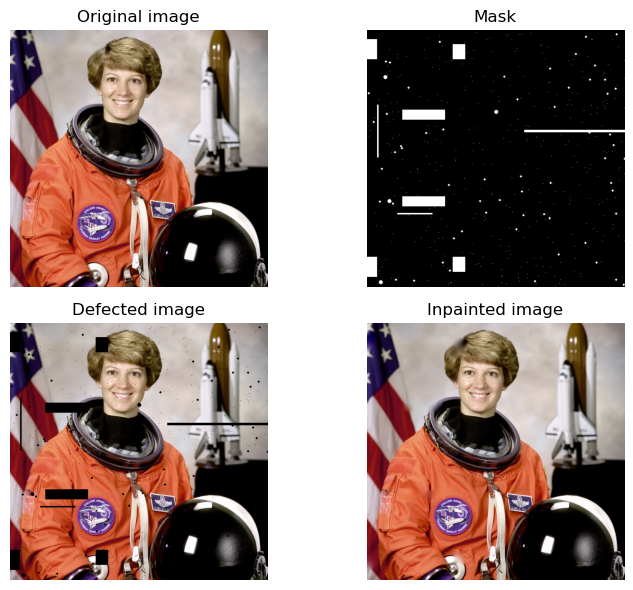

In [14]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8,6))
ax = axes.ravel()

ax[0].set_title('Original image')
ax[0].imshow(original_image)

ax[1].set_title('Mask')
ax[1].imshow(mask, cmap=plt.cm.gray)

ax[2].set_title('Defected image')
ax[2].imshow(image_defect)

ax[3].set_title('Inpainted image')
ax[3].imshow(image_result)

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.show()